In [14]:
import salem
import xarray as xr
from utils import constants as cnst
from utils import u_plot as uplot, u_darrays as uda, u_met
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [40]:
era = '/home/ck/DIR/mymachine/ERA5/hourly/surface/ERA5_2010_08_srfc.nc'

In [41]:
ds = xr.open_dataset(era)
ds = uda.flip_lat(ds)

In [42]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 87, longitude: 143, time: 248)
Coordinates:
  * longitude  (longitude) float32 -18.5 -18.25 -18.0 -17.75 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 3.5 3.75 4.0 4.25 ... 24.25 24.5 24.75 25.0
  * time       (time) datetime64[ns] 2010-08-01T06:00:00 ... 2010-08-31T03:00:00
Data variables:
    cape       (time, latitude, longitude) float32 ...
    p60.162    (time, latitude, longitude) float32 ...
    p61.162    (time, latitude, longitude) float32 ...
    p62.162    (time, latitude, longitude) float32 ...
    p63.162    (time, latitude, longitude) float32 ...
    p71.162    (time, latitude, longitude) float32 ...
    p72.162    (time, latitude, longitude) float32 ...
    tclw       (time, latitude, longitude) float32 ...
    tciw       (time, latitude, longitude) float32 ...
    p79.162    (time, latitude, longitude) float32 ...
    p80.162    (time, latitude, longitude) float32 ...
    p81.162    (time, latitude, longitude) float32 ...
    p82.162    (time, latitude, longitude) float32 ...
    p83.162    (time, latitude, longitude) float32 ...
    p84.162    (time, latitude, longitude) float32 ...
    p86.162    (time, latitude, longitude) float32 ...
    tcrw       (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tcwv       (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    blh        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    lsm        (time, latitude, longitude) float32 ...
    lcc        (time, latitude, longitude) float32 ...
    mcc        (time, latitude, longitude) float32 ...
    hcc        (time, latitude, longitude) float32 ...
    ishf       (time, latitude, longitude) float32 ...
    ie         (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    u100       (time, latitude, longitude) float32 ...
    v100       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-02-06 06:08:25 GMT by grib_to_netcdf-2.10.0: grib_to_n...

In [43]:
monthlyclim = ds.groupby('time.hour').mean('time')

In [44]:
## a clean way of plotting - use matplotlib functions directly:

def draw_map_wind(ax, data, lon, lat, title=None,  mask_sig=None, quiver=None, contour=None, cbar_label=None, **kwargs):

    mapp = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), **kwargs)  # this is the actual plot
    
    ## mask for significance indicator
    if mask_sig is not None:
         plt.contourf(lon, lat, mask_sig, colors='none', hatches='.',
                     levels=[0.5, 1], linewidth=0.1)
    
    ## quiver list
    if quiver is not None:
        qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'], scale=quiver['scale'])
        qk = plt.quiverkey(qu, 0.9, 0.03, 4, '4 m s$^{-1}$',
                           labelpos='E', coordinates='figure')
        
    ## additional contour on plot   
    if contour is not None:
        ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], cmap=contour['cmap'] )
        
    
    ax.coastlines()   ## adds coastlines
    # Gridlines
    xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
    xl.xlabels_top = False   ## labels off
    xl.ylabels_right = False
    plt.title(title)
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
    cbar = plt.colorbar(mapp)  # adds colorbar
    cbar.set_label(cbar_label)
    plt.tight_layout()
    #plt.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/conny_examples/850hpa_rh_ERA5_peru.png')

/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


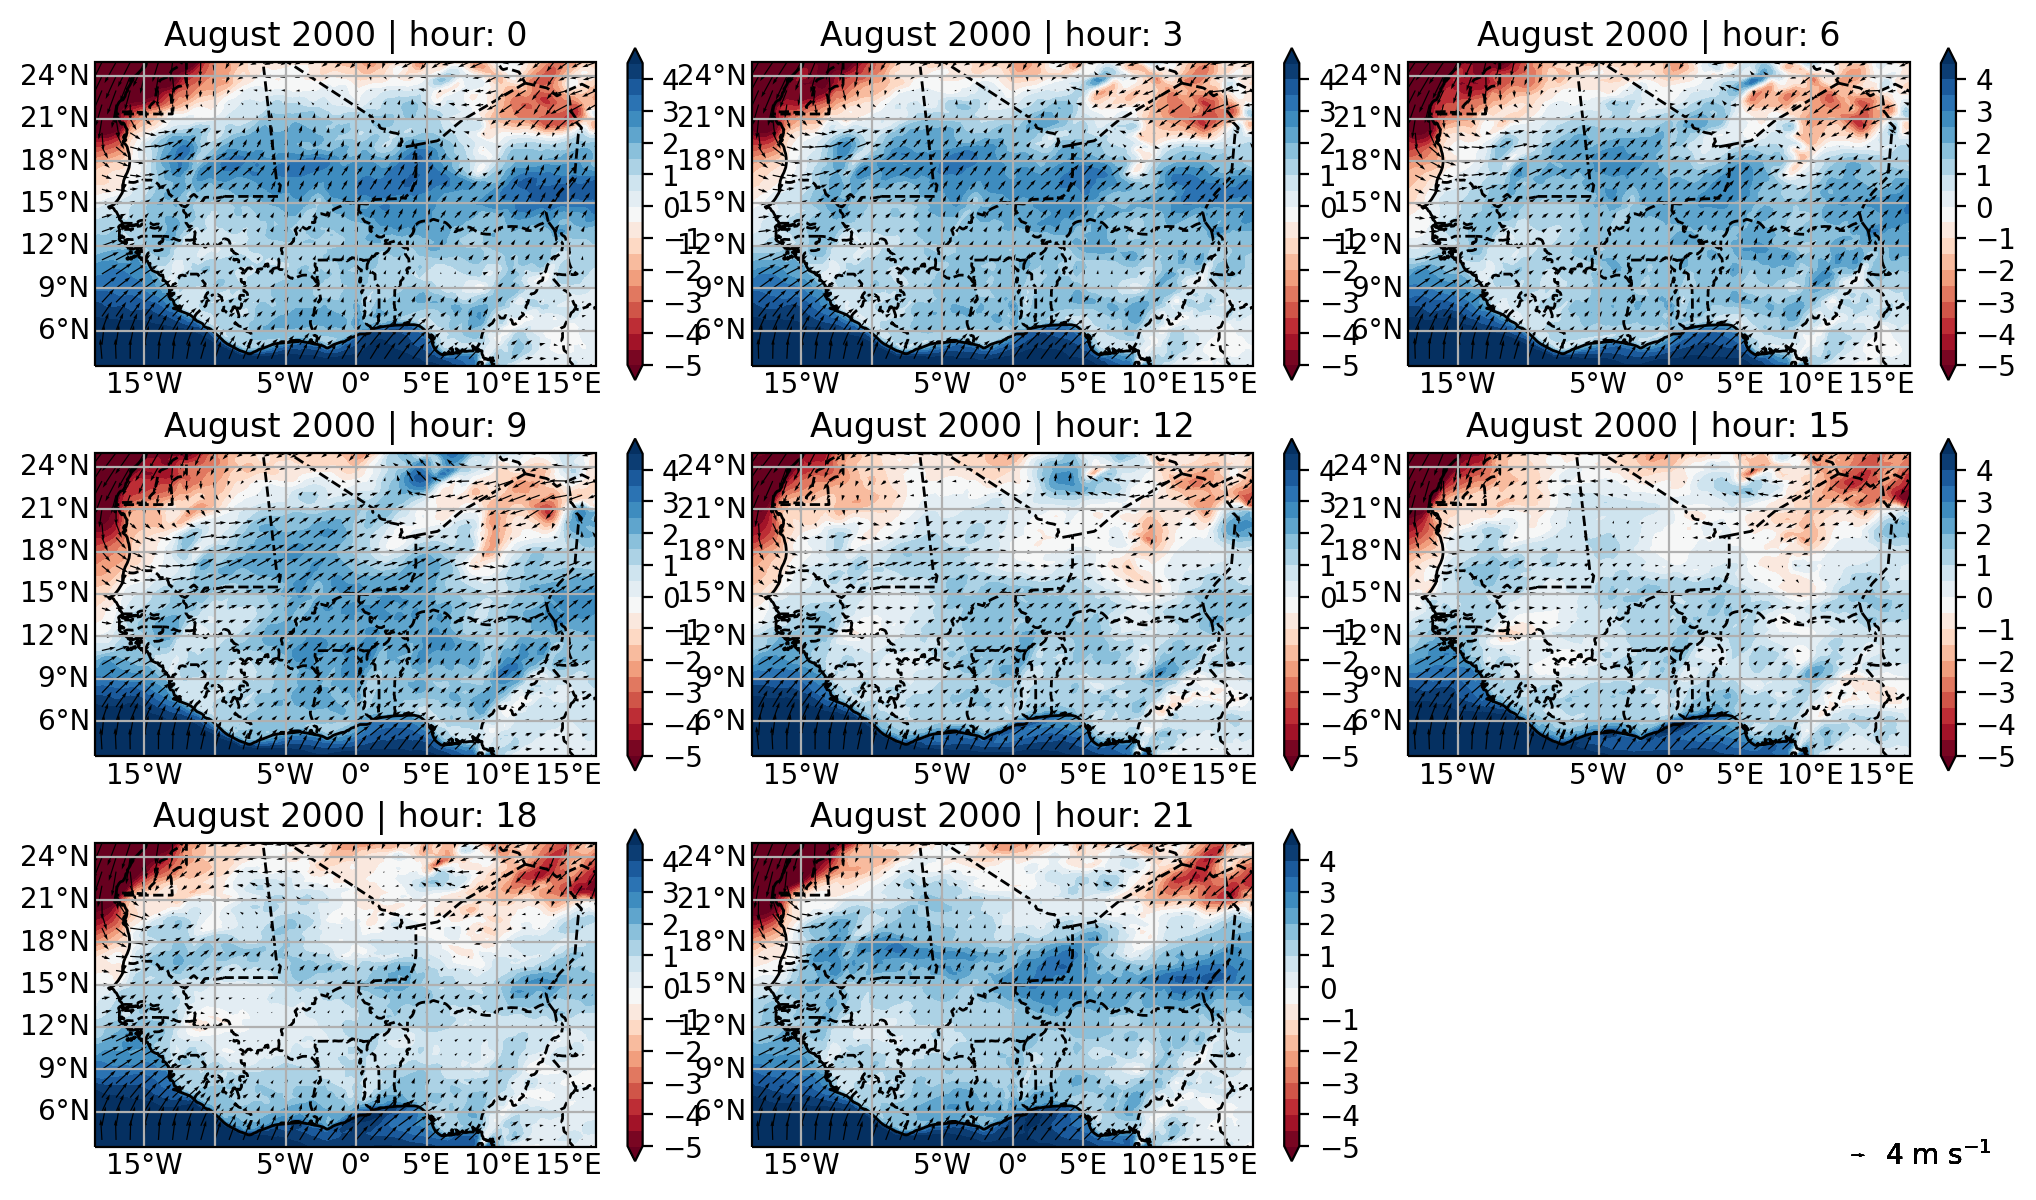

In [45]:
import ipdb
f = plt.figure(figsize=(10,6), dpi=200)
for hids, h in enumerate(monthlyclim.hour.values):
    ax = f.add_subplot(3,3,hids+1, projection=ccrs.PlateCarree())
    # preparation of wind vector data in plot
    st=4
    sarrow = 2
    xquiv = monthlyclim.longitude[sarrow::st]
    yquiv = monthlyclim.latitude[sarrow::st]
    
    shour = monthlyclim.sel(hour=h)

    uu = (shour['u10'].values)[sarrow::st, sarrow::st]
    vv = (shour['v10'].values)[sarrow::st, sarrow::st]

    qin = {'x' : xquiv, 'y' : yquiv, 'u' : uu, 'v' : vv, 'scale' : 150}
    
    lon = shour.longitude
    lat = shour.latitude
    #ipdb.set_trace()
    draw_map_wind(ax, shour['v10'], shour.longitude, shour.latitude, title='August 2000 | hour: '+str(h),  quiver=qin, cbar_label='', cmap='RdBu', levels=np.arange(-5,5, 0.5), extend='both')


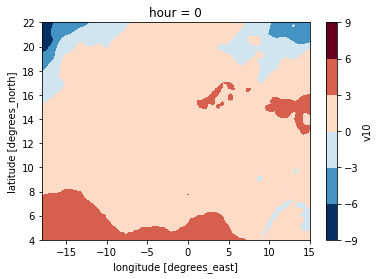

In [9]:
monthlyclim['v10'].sel(hour=0).plot.contourf()

In [53]:
lp = monthlyclim.mean(['latitude', 'longitude'])

In [54]:
lp

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tp       (month) float32 dask.array<chunksize=(1,), meta=np.ndarray>

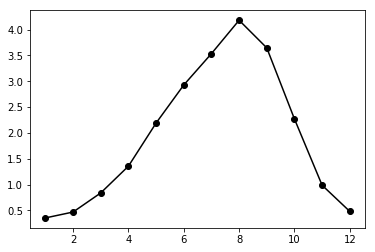

In [57]:
plt.plot(lp.month.values, lp['tp'], '-ko')